# Project: Analysing the TMDb movie dataset 

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction
In this notebook, I'm trying to analyize the TMDb movie dataset to answer some questions i asked about it using some statistics and visualization methods and some tools like pandas, numpy and matplotlib

the questions i want to answer are:

1: Which Movie Has The Highest Or Lowest Profit?

2: What is the top 10 movies made profits?

3 : which movie has the highest runtime and which has shortest runtime?

4: What are the top_10 Longest runtime movies?

5 : what is the mean, median, and mode runtime?

6: What's the number of released movies year by year?

7: What is the highest and lowest release years?

8: What is the most popular month of year to release a movie?

9 : what is the total profit for each year ?

10: is more budget led to more revenue?

11: what is the most keyword ?

12: what is the most popular movies directors?

13 : What is the Average Runtime year by year?





In [ ]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

%matplotlib inline
# Remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html


<a id='wrangling'></a>
## Data Wrangling
### in this step i just choice the dataset that i'm interested in, and then i download it on my machine, then upload it to this notebook 

### General Properties

In [ ]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
df = pd.read_csv('tmdb-movies.csv')
print(df.shape)
df.head(3)

(10866, 21)


,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08


In [ ]:
df.tail(3)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
10863,39768,tt0060161,0.065141,0,0,Beregis Avtomobilya,Innokentiy Smoktunovskiy|Oleg Efremov|Georgi Z...,NaN,Eldar Ryazanov,NaN,...,An insurance agent who moonlights as a carthie...,94,Mystery|Comedy,Mosfilm,1/1/66,11,6.5,1966,0.000000,0.0
10864,21449,tt0061177,0.064317,0,0,"What's Up, Tiger Lily?",Tatsuya Mihashi|Akiko Wakabayashi|Mie Hama|Joh...,NaN,Woody Allen,WOODY ALLEN STRIKES BACK!,...,"In comic Woody Allen's film debut, he took the...",80,Action|Comedy,Benedict Pictures Corp.,11/2/66,22,5.4,1966,0.000000,0.0
10865,22293,tt0060666,0.035919,19000,0,Manos: The Hands of Fate,Harold P. Warren|Tom Neyman|John Reynolds|Dian...,NaN,Harold P. Warren,It's Shocking! It's Beyond Your Imagination!,...,A family gets lost on the road and stumbles up...,74,Horror,Norm-Iris,11/15/66,15,1.5,1966,127642.279154,0.0


### some information from the data sert
1- there are some rows that have 0 in the budget_adj and revenue_adj columns

2- the same thing for budget and revenue columns

In [ ]:
# know the data type of each column
df.dtypes

id                        int64
imdb_id                  object
popularity              float64
budget                    int64
revenue                   int64
original_title           object
cast                     object
homepage                 object
director                 object
tagline                  object
keywords                 object
overview                 object
runtime                   int64
genres                   object
production_companies     object
release_date             object
vote_count                int64
vote_average            float64
release_year              int64
budget_adj              float64
revenue_adj             float64
dtype: object

In [ ]:
# how many null values in each column 
df.isnull().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

## it is clear that the column homepage is the most one has null values, then tagline, then keywords, then production companies



### Data Cleaning : removing the unused columns from the dataset

### remove the unuseful columns that are useless in the analysing process, they are:
#### imdb_id, homepage, tagline, overview, budjet_adj, revenue_adj

In [ ]:
columns_to_remove = ['imdb_id','homepage','tagline','overview','budget_adj','revenue_adj']
df.drop(columns=columns_to_remove, axis = 1, inplace=True)
df.head(3)

,id,popularity,budget,revenue,original_title,cast,director,keywords,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year
0,135397,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,monster|dna|tyrannosaurus rex|velociraptor|island,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015
1,76341,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,future|chase|post-apocalyptic|dystopia|australia,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015
2,262500,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,based on novel|revolution|dystopia|sequel|dyst...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015


### remove duplicated rows

In [ ]:
print("before remove duplicated rows, no of duplicated rows= ",df.duplicated().sum())
df.drop_duplicates(inplace=True)
print("after remove the duplicated rows, no of duplicated rows =",df.duplicated().sum())

before remove duplicated rows, no of duplicated rows=  1
after remove the duplicated rows, no of duplicated rows = 0


### replace the rows that have 0 value in its budget or revenue with nan

In [ ]:
# movies have 0 budget
budget_0 = df[df['budget']==0]
budget_0.shape[0]

5696

In [ ]:
# movies have 0 revenue
revenue_0 = df[df['revenue'] == 0]
revenue_0.shape[0]

6016

In [ ]:
df['original_title'].value_counts().head(10)

Hamlet                  4
Wuthering Heights       3
Life                    3
Jane Eyre               3
Shelter                 3
Beauty and the Beast    3
A Christmas Carol       3
Annie                   3
Frankenstein            3
The Three Musketeers    3
Name: original_title, dtype: int64

### it's clear that there are duplicated title names, but they are different in the release year, which means that there are some movies that remaked with different cast or tools etc, and there are some movies that have the same name and completerly different story like The Avengers

In [ ]:
df[df['original_title']=='The Avengers']

,id,popularity,budget,revenue,original_title,cast,director,keywords,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year
4361,24428,7.637767,220000000,1519557910,The Avengers,Robert Downey Jr.|Chris Evans|Mark Ruffalo|Chr...,Joss Whedon,new york|shield|marvel comic|comic|superhero,143,Science Fiction|Action|Adventure,Marvel Studios,4/25/12,8903,7.3,2012
9051,9320,0.539133,60000000,48522832,The Avengers,Ralph Fiennes|Uma Thurman|Sean Connery|Patrick...,Jeremiah S. Chechik,london|weather manipulation|wretch,89,Thriller,Jerry Weintraub Productions|Warner Bros.,8/13/98,121,4.6,1998


### convert the type of release date to datetime formate

In [ ]:
df['release_date'] = pd.to_datetime(df['release_date'])
df['release_date'].head()

0   2015-06-09
1   2015-05-13
2   2015-03-18
3   2015-12-15
4   2015-04-01
Name: release_date, dtype: datetime64[ns]

### Adding a month column 

In [ ]:
df['month'] = df['release_date'].dt.month

### Define some functions 

In [ ]:
# show the mean, median, and mode

def mean_meadian_mode(df, col):
    mean = df[col].mean()
    median = df[col].median()
    mode = df[col].mode()
    
    print('mean {} is {} '.format(col,mean))
    print('median {} is {} '.format(col, median))
    print('most frequency {} is {} '.format(col, mode[0]))

In [ ]:
# min_max function 

def min_max(df,col):
    max_id = df[col].idxmax()
    min_id = df[col].idxmin()
    
    max_result = df[col][max_id]
    min_result = df[col][min_id]
    
    max_movie = df['original_title'][max_id]
    min_movie = df['original_title'][min_id]
    
    return max_movie, min_movie, max_result, min_result 

<a id='eda'></a>
## Exploratory Data Analysis

### Research Question 1: Which Movie Has The Highest Or Lowest Profit?

In [ ]:
# replace the 0 values of revenue and budget with nan 

df['budget'].replace(0, np.NAN)
df['revenue'].replace(0, np.NAN)
print()

In [ ]:
# add a new column named profit 
df['profit'] = df['revenue'] - df['budget']

In [ ]:
highest_movie, lowest_movie, highest_profit, lowest_profit = min_max(df,'profit')

print("The highest movie profit title is '{}' and it's profit = '{}'".format(highest_movie, highest_profit))
print("The highest movie profit title is '{}' and it's profit = '{}'".format(lowest_movie, lowest_profit))

The highest movie profit title is 'Avatar' and it's profit = '2544505847'
The highest movie profit title is 'The Warrior's Way' and it's profit = '-413912431'


### Research Question 2: What is the top 10 movies made profits?

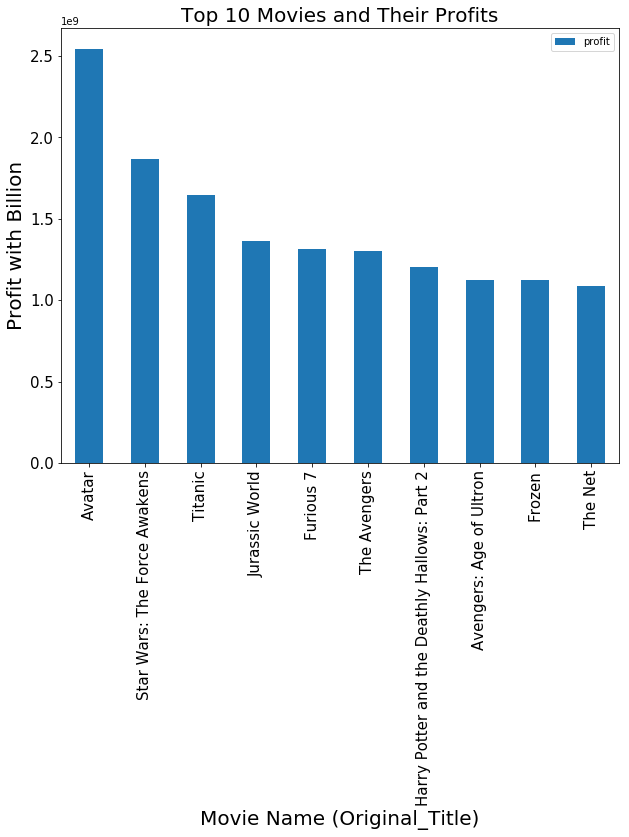

In [ ]:
top_10 = df.sort_values(by='profit', ascending=False) [['original_title', 'profit']]
top_10 = top_10.head(10)

top_10.set_index('original_title', inplace=True)
top_10.plot(kind='bar', fontsize=15, figsize=(10,8))

plt.xlabel('Movie Name (Original_Title)', fontsize = 20)
plt.ylabel('Profit with Billion', fontsize = 20)
plt.title('Top 10 Movies and Their Profits', fontsize = 20)
plt.show();

### from the plot above, we can see the top 10 movies that made profits

### Research Question 3 : which movie has the highest runtime and which has shortest runtime?

In [ ]:
# first: to avoid the 0 values in the runtime column, replace it with nan
df['runtime'] = df['runtime'].replace(0, np.NAN)

In [ ]:
longest_movie, shortest_movie, longest_runtime, shortest_runtime = min_max(df,'runtime')

print("The Highest runtime movie is '{}' with runtime of '{}' minutes".format(longest_movie, longest_runtime))
print("The Shortest runtime movie is '{}' with runtime of '{}' minutes".format(shortest_movie, shortest_runtime))

The Highest runtime movie is 'The Story of Film: An Odyssey' with runtime of '900.0' minutes
The Shortest runtime movie is 'Fresh Guacamole' with runtime of '2.0' minutes


### is there more than one movie with this runtime?


In [ ]:
df[df['runtime'] == df['runtime'].max()][['original_title', 'runtime']]

,original_title,runtime
3894,The Story of Film: An Odyssey,900.0


In [ ]:
df[df['runtime'] == df['runtime'].min()][['original_title', 'runtime']]

,original_title,runtime
4883,Fresh Guacamole,2.0
4890,Cousin Ben Troop Screening,2.0
7905,The Adventures of AndrÃ© and Wally B.,2.0
10550,Luxo Jr.,2.0
10754,Bambi Meets Godzilla,2.0


### it's clear that there are more than one movie (exactly 5 movies) with the shortest runtime, and only on movie with highest runtime

### Research Question 4: What are the top_10 Longest runtime movies?

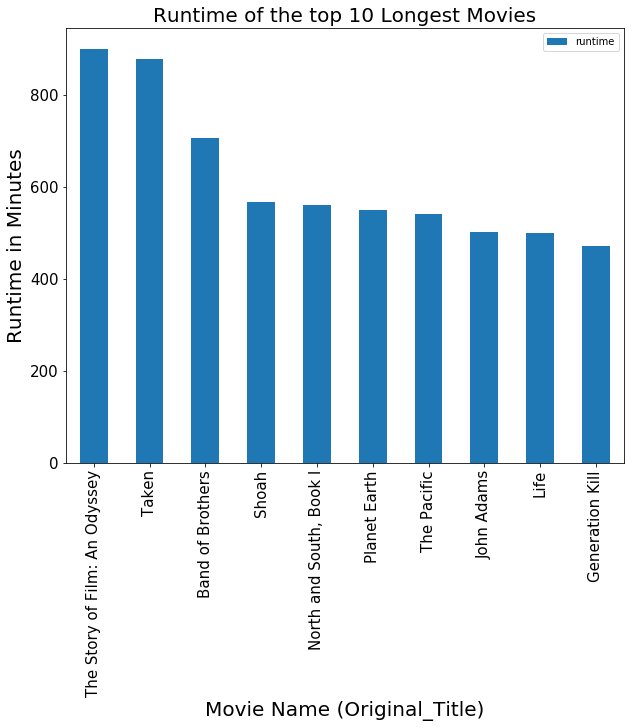

In [ ]:
top_10 = df.sort_values(by='runtime', ascending=False)[['original_title', 'runtime']].head(10)
top_10.set_index('original_title', inplace=True)

top_10.plot(kind='bar', figsize=(10,8), fontsize=15)
plt.xlabel('Movie Name (Original_Title)', fontsize = 20)
plt.ylabel('Runtime in Minutes', fontsize=20)
plt.title('Runtime of the top 10 Longest Movies', fontsize=20)
plt.show();

### Research Question 5 : what is the mean, median, and mode runtime?

In [ ]:
mean_meadian_mode(df, 'runtime')

mean runtime is 102.3638545320288 
median runtime is 99.0 
most frequency runtime is 90.0 


### Research Question 6: What's the number of released movies year by year?

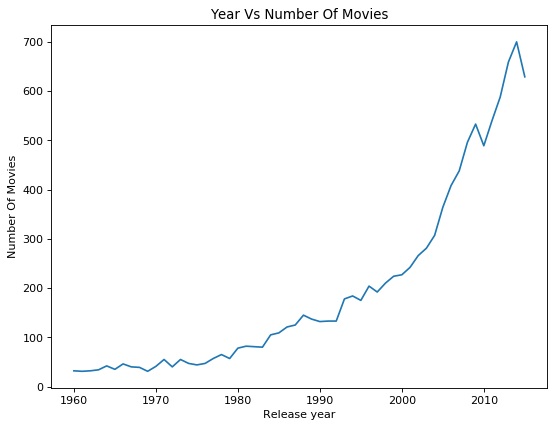

In [ ]:
figure(figsize=(8, 6), dpi=80)
plt.title("Year Vs Number Of Movies")
plt.xlabel('Release year')
plt.ylabel('Number Of Movies')
plt.plot(release_years)
plt.show()

### From the above plot it's clear that the number of produced movies are increased overtime, and i think it's becouse of the ability of making a movie become easier overtime 

### Research Question 7: What is the highest and lowest release years?

In [ ]:
high_year = release_years.idxmax()
low_year = release_years.idxmin()

high_mv_number = release_years.max()
low_mv_number = release_years.min()

print("The Highest release year is '{}' with number of movies = '{}'".format(high_year, high_mv_number))
print("The Lowest release year is '{}' with number of movies = '{}'".format(low_year, low_mv_number))

The Highest release year is '2014' with number of movies = '700'
The Lowest release year is '1961' with number of movies = '31'


### Research Question 8: What is the most popular month of year to release a movie?

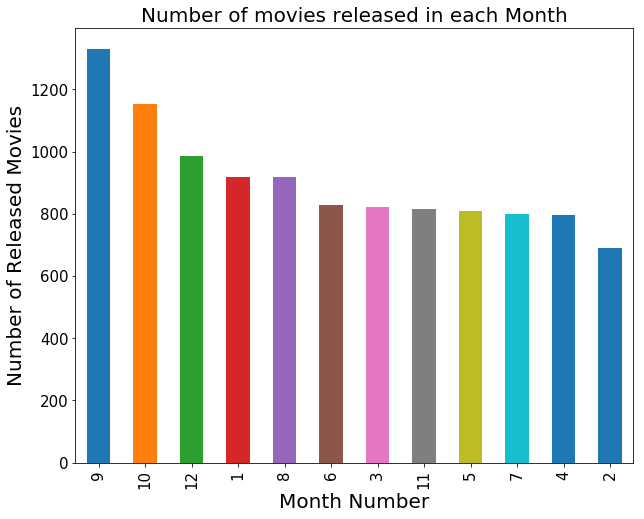

In [ ]:
df['month'].value_counts().plot(kind = 'bar', figsize = (10,8), fontsize = 15)

plt.xlabel('Month Number', fontsize = 20)
plt.ylabel('Number of Released Movies', fontsize = 20)
plt.title('Number of movies released in each Month', fontsize = 20)
plt.show();

### from the plot above, it's clear that the most popular month to release a movie in is September, then October, then December

### Research Question 9 : what is the total profit for each year ?  

In [ ]:
year_profit = df.groupby('release_year')['profit'].sum()

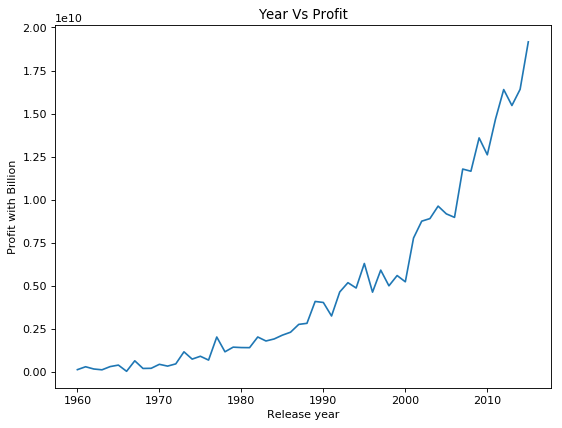

In [ ]:
# plot release_years profits

figure(figsize=(8, 6), dpi=80)
plt.title("Year Vs Profit")
plt.xlabel('Release year')
plt.ylabel('Profit with Billion')
plt.plot(year_profit)
plt.show()

### Also the profit increase overtime year after year, and it something reasonable as the number of produced movies are increased, the profit will also increase

### Research Question 10: is more budget led to more revenue?

(3854, 16)


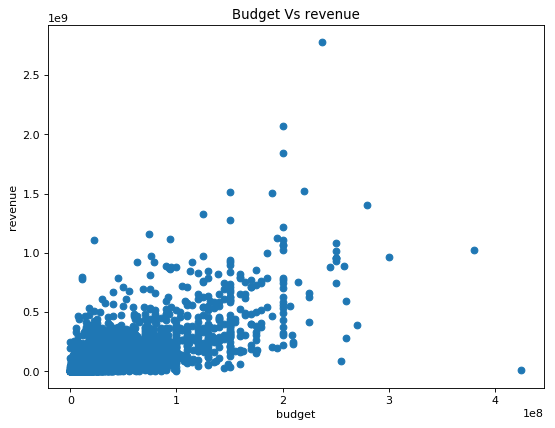

In [ ]:
figure(figsize=(8, 6), dpi=80)
plt.title("Budget Vs revenue")
plt.xlabel('budget')
plt.ylabel('revenue')
# select the movies that not 0 budget or 0 revenue
data = df[df['budget'] != 0]
data = data[data['revenue'] != 0]
plt.scatter(data['budget'], data['revenue'])
print(data.shape)
plt.show()

### From the scatter plot above, it's clear that in general, the more the budget, the more the profit, and there are some low budget movies that make more revenue, and high budget movies make less revenue

### Research Question 11: what is the most keyword ?

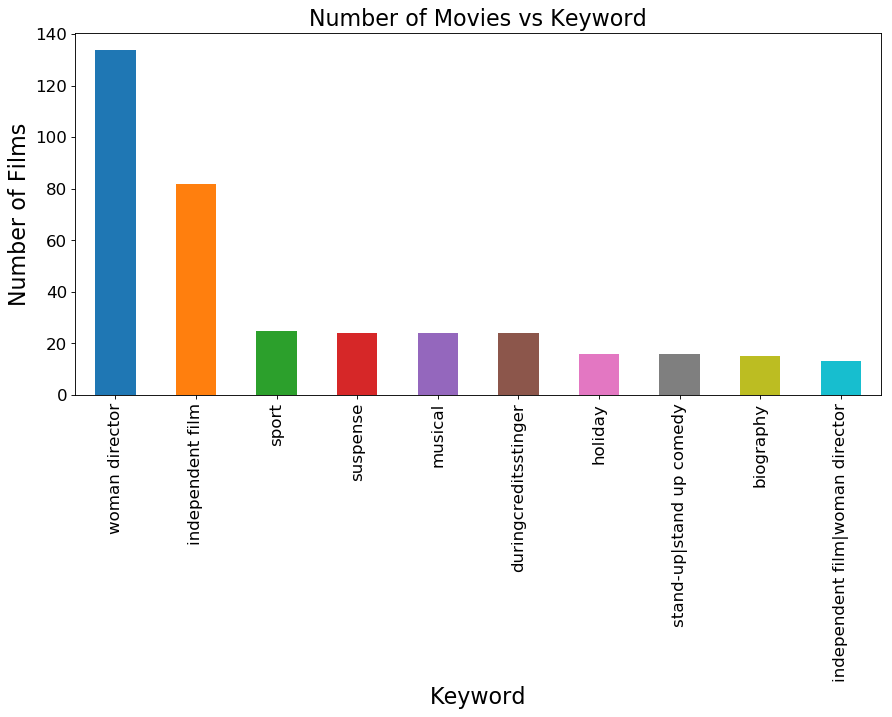

In [ ]:
figure(figsize=(13,6), dpi= 80)
df['keywords'].value_counts().head(10).plot(kind='bar', fontsize = 15)
plt.xlabel('Keyword', fontsize = 20)
plt.ylabel('Number of Films', fontsize = 20)
plt.title('Number of Movies vs Keyword', fontsize = 20)
plt.show()

### From the plot above, it seems that the most frequent keywords are woman director, then independent film, then sport 

### Research Question 12: what is the most popular movies directors?

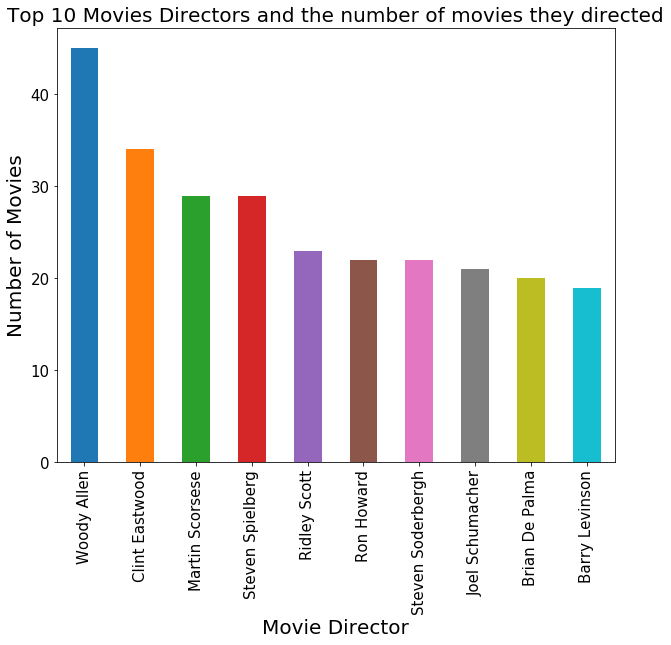

In [ ]:
top_10 = df['director'].value_counts().head(10)

top_10.plot(kind = 'bar', figsize=(10,8), fontsize=15)
plt.xlabel('Movie Director', fontsize = 20)
plt.ylabel('Number of Movies', fontsize = 20)
plt.title('Top 10 Movies Directors and the number of movies they directed', fontsize=20)
plt.show();

### From the plot above, it's clear that top 10 movies directors are Woody Allen, then Clint Eastwood, then Martin Scorsese

### ### Research Question 13 : What is the Average Runtime year by year?

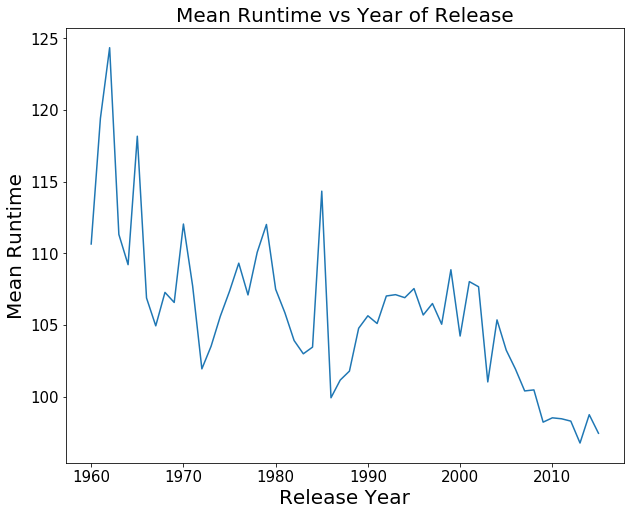

In [ ]:
average_runtime = df.groupby('release_year')['runtime'].mean()

average_runtime.plot(kind = 'line', figsize=(10,8), fontsize=15)
plt.xlabel('Release Year', fontsize = 20)
plt.ylabel('Mean Runtime', fontsize = 20)
plt.title('Mean Runtime vs Year of Release', fontsize = 20)
plt.show();

### from the plot above, it seems that the average runtime of movies is decreasing overtime

<a id='conclusions'></a>
## Conclusions
#### After analysing these data, i found some insights, and they are:

### Some Recommendations could i give to movies  producers:
* successful movie should has a budget of about 15 M dollars
* successful movie should be released in months 9, 10, 11
* it's better to make Woody Allen, or Clint Eastwood, or Martin Scorsese produce your movie
* successful movie has a runtime of about 113 minutes

### Some insights i get from my analysis
* 'Avatar', 'Star Wars' and 'Titanic' are the most profitable movies.
* Maximum Number Of Movies Release In year 2014.
* Average runtime of the movies are decreasing year by year.

### Limitations:

* All results are limited to the original data set and has no advanced statistics were performed, the results     can only be treated as indicators and are not generalizable.

* We have used TMBD Movies dataset for our analysis and worked with popularity, revenue and runtime. Our analysis is limited to only the provided dataset. For example, the dataset does not confirm that every release of every director is listed.

* There was a lot of missing values in budget and revenue columns which may cause skewed in this analysis

In [ ]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0